In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import dataset
df = pd.read_csv('Customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with zero(0) as tenure as 0 and no total charges are recorded.

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# check the null values in dataset

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# for over all dataset null values
df.isnull().sum().sum()

0

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# lets check for duplicate values


In [11]:
df.duplicated().sum()

0

In [12]:
# to check based on customer duplicate id
df['customerID'].duplicated().sum()

0

# Converted 0 and 1 values of SeniorCitizen to Yes\No to make it easier to understand.

In [15]:
# to create a function
def conv(value):
    if value == 1:
     return "yes"
    else:
     return "No"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


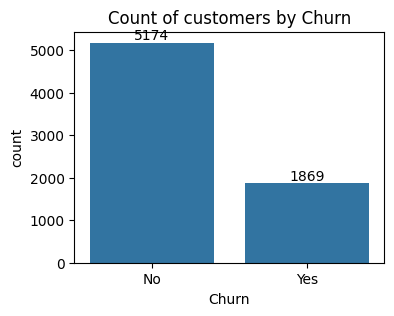

In [31]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x= 'Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

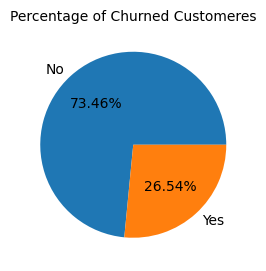

In [33]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"], labels= gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize= 10)
plt.show()


# from the given piechart we can canclude that `26.54%` of our customeres have `Churned` out.
now lets explore the reason behind it!

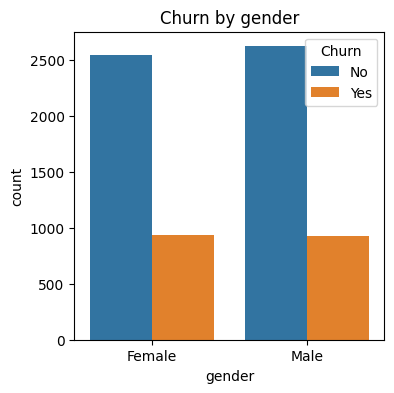

In [40]:
plt.figure(figsize=(4,4))
sns.countplot(x= 'gender', hue='Churn', data=df)
plt.title("Churn by gender")
plt.show()

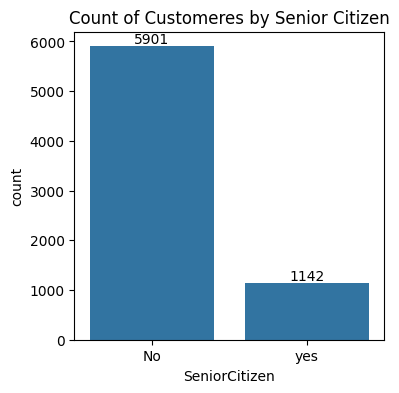

In [46]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x= 'SeniorCitizen', data=df)
ax = ax.bar_label(ax.containers[0])
plt.title("Count of Customeres by Senior Citizen")
plt.show()

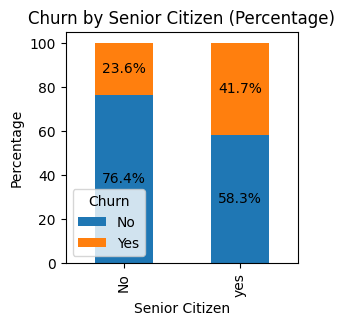

In [44]:
# Create a cross-tabulation to get counts and calculate percentages
churn_data = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Create the stacked bar chart
ax = churn_data.plot(kind='bar', stacked=True, figsize=(3, 3), color=['#1f77b4', '#ff7f0e'])

# Add the percentage labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Customize the chart
plt.title('Churn by Senior Citizen (Percentage)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.show()

# Comaparetively a greater percentage of people in `SeniorCitizen` category have churned.

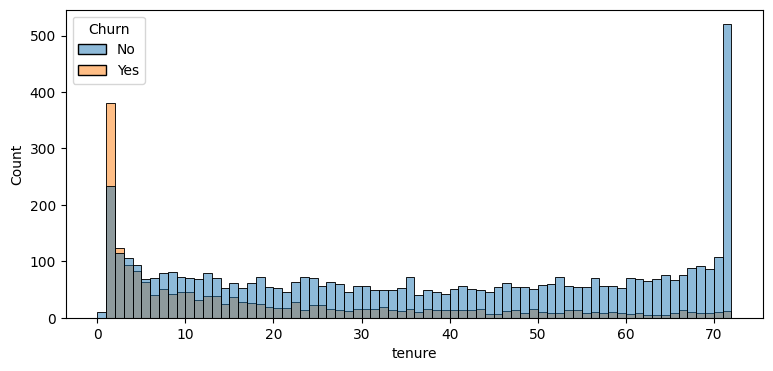

In [48]:
plt.figure(figsize=(9,4))
sns.histplot(x= 'tenure', data=df, bins=72, hue='Churn')
plt.show()

# People who have used our services for a long time have `stayed` and people who have used our services `1 or 2 months` have churned.

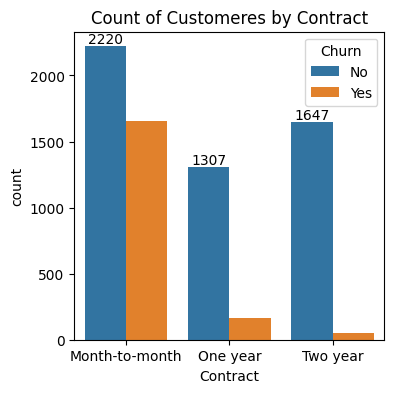

In [50]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x= 'Contract', data=df, hue='Churn')
ax = ax.bar_label(ax.containers[0])
plt.title("Count of Customeres by Contract")
plt.show()

# People who have `month to month` contract are likely to `churn` then from those who have `1 or 2 years` or contract.

In [51]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

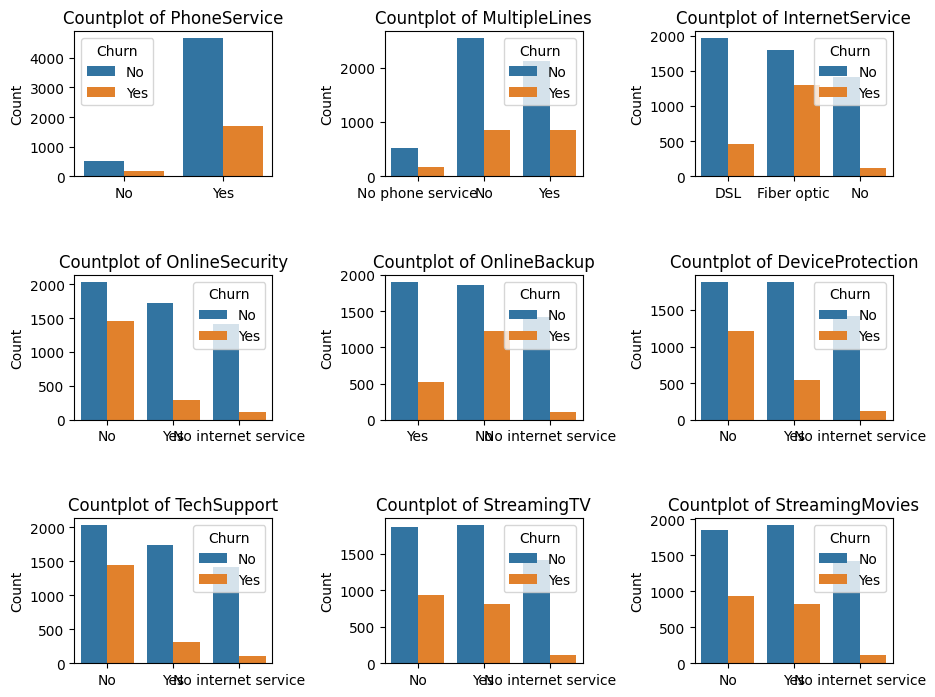

In [56]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define the number of rows and columns for the subplots
n_cols = 3  # Number of columns in subplot grid
n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))
fig.tight_layout(pad=5.0)  # Adjust layout spacing

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue='Churn')
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel('')  # Optionally remove x-label
    axes[i].set_ylabel('Count')

# Remove any empty subplots if the number of columns doesn't fill all subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Display the plots
plt.show()


# The data shows that customers with services like `PhoneService`, `OnlineBackup`, `DeviceProtection`, and `StreamingMovies` have a `lower churn rate`. However, `churn rates are higher` for customers without services like `OnlineSecurity`, `TechSupport`, or for those using `Fiber optic` internet. In general, service availability and type of internet connection seem to have a significant influence on customer retention.

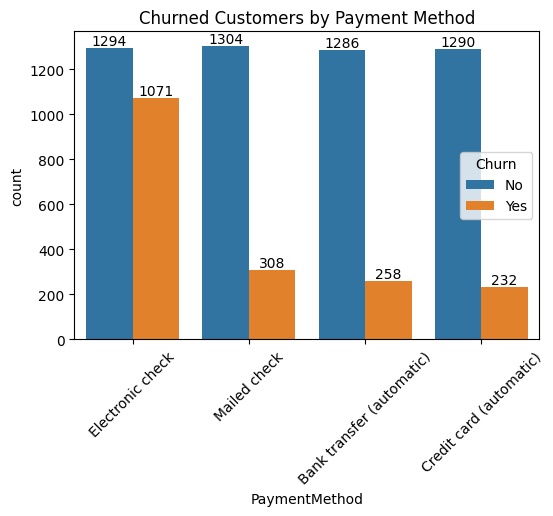

In [73]:
# Create the figure and the countplot
plt.figure(figsize=(6,4))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')

# Add labels to the bars
ax.bar_label(ax.containers[0])  # For the first group of bars
ax.bar_label(ax.containers[1])  # For the second group of bars

# Rotate x-tick labels by 90 degrees
plt.xticks(rotation=45)

# Title and display the plot
plt.title("Churned Customers by Payment Method")
plt.show()


# Customer is likely to churn when he is using electronic check as a payment 